## Least squares Method

$$
\large
f(x) = Ax + B \quad 
\left\{
\begin{array}{ll}
Slope & A = \frac{Cov(x, y)}{\sigma^2 x} \\
Intercept & B = \mu y - A\mu x
\end{array}
\right.
$$

In [307]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [308]:
x = np.linspace(0, 100, 50)
x_mean = sum(x)/len(x)
x_mean

50.000000000000007

In [309]:
t = x + np.random.randn(len(x))*7 + 30
t_mean = sum(t)/len(t)
t_mean

79.21247157423592

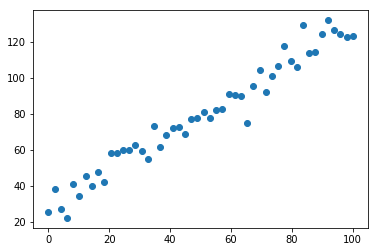

In [310]:
plt.scatter(x, t)

In [311]:
xx = []
tt = []
for i, j in zip(x, t):
    xx.append((i-x_mean)**2)
    tt.append(np.abs((j-t_mean)*(i-x_mean)))
xxv = sum(xx)
ttv = sum(tt)
print(xxv, ttv)

43367.3469388 43924.8127847


1.01285450656


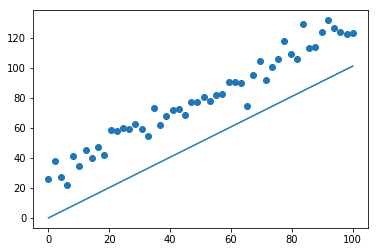

In [313]:
a = ttv/xxv
print(a)
plt.scatter(x, t)
plt.plot(x, a*x)

28.569746246


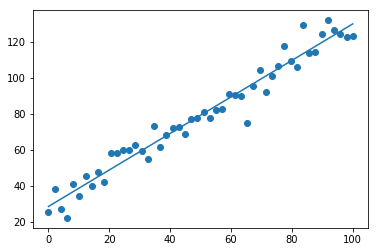

In [314]:
b = t_mean - a*x_mean
print(b)
plt.scatter(x, t)
plt.plot(x, a*x + b)

## Gradient Descent

$$
\large Loss\;(MSE) \; = \; \frac{1}{2n}\sum_{i=1}^{n}(f(x)_i-t_i)^2 \qquad ※f(x) = Ax + B \\
$$

$$
\large \frac{dLoss}{dA} \; = \; -\frac{1}{n}\sum_{i=1}^n(t_i - Ax - B)x
$$

$$
\large \frac{dLoss}{dB} \; = \; -\frac{1}{n}\sum_{i=1}^n (t_i - Ax - B)
$$

$$
\large ※(A, B)\; \longrightarrow \; (w_0, w_1)=W \quad \frac{dLoss}{dW_n} \; = \; -\frac{1}{n}\sum_{i=1}^n (t_i - w^Tx_i)x_{in} \quad \small (※x_{in} = 1 \; for \; w_1)
$$

$$
\large W_n \; = \; W_n - \alpha \times \frac{dLoss}{dWn}
$$

In [315]:
learning_rate = 0.0001
num_steps = 50000

W = np.array([np.random.rand(), 0])
X = np.array([x, np.ones(len(x))])
print(W.shape, ' ', W)
print(X.shape, ' ', X[0,0:5], ' ', X[1,0:5])

(2,)   [ 0.6610621  0.       ]
(2, 50)   [ 0.          2.04081633  4.08163265  6.12244898  8.16326531]   [ 1.  1.  1.  1.  1.]


[  1.01862288  28.1259627 ]
1.01285450656 28.569746246


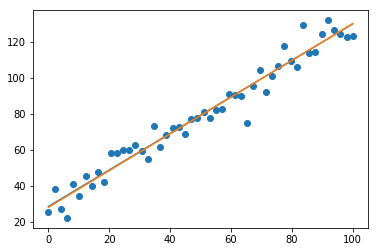

In [318]:
for _ in range(num_steps):
#     Loss = sum((y - t)**2)/len(x)
#     W[0] += learning_rate * sum((t - y)*X[0])/len(x)
#     W[1] += learning_rate * sum((t - y)*X[1])/len(x)
    y = np.dot(W.transpose(), X)
    W += learning_rate * np.dot((t - y), X.transpose()) / len(x)
print(W)
print(a, b)
plt.scatter(x, t)
plt.plot(x, a*x+b) # Least Squares Method
plt.plot(x, W[0]*x+W[1])